In [312]:
import requests
from bs4 import BeautifulSoup
import re

In [84]:
url ='http://bj.bendibao.com/ditie/linemap.shtml'

In [223]:
import requests
from bs4 import BeautifulSoup
import re

In [224]:
import urllib.request
response = urllib.request.urlopen(url)
html = response.read().decode('utf8')
soup = BeautifulSoup(html, 'lxml')  # 变成汤汁

In [225]:
next_url_list=[]
for cc in soup.find_all('span',  class_ = 'total'):
    next_url=cc.find_all('a')[0]
    next_url=str('http://bj.bendibao.com/')+next_url.get('href')
    next_url_list.append(next_url)

In [296]:
line=0
line_station={}
line11=[]
for st_url in next_url_list:
    line11=[]
    line += 1
    response = urllib.request.urlopen(st_url)
    html = response.read().decode('utf8')
    soup = BeautifulSoup(html, 'lxml') 
    stations = soup.find_all('div',class_='station')
    for station in stations: 
        name = station.find('a', class_='link').get_text()
        line11.append(name)
        line_station['北京'+str(line)+'号线']=line11

In [312]:
import networkx as nx
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

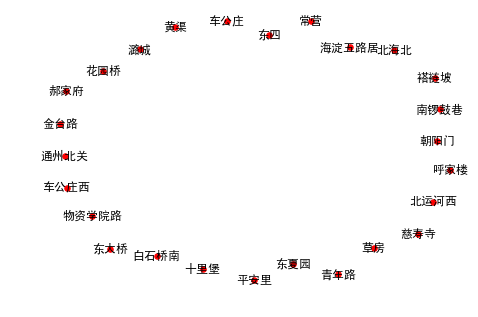

In [337]:
city_graph = nx.Graph()
city_graph.add_nodes_from(line_station['北京6号线'])
%matplotlib inline
nx.draw(city_graph , with_labels=True, node_size=30)

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [4]:
x, y= data['data'],data['target']

In [5]:
x[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [6]:
y[0]

24.0

In [7]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [9]:
x[:,0]

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 5], y)

In [11]:
room_num = x[:,5]

In [12]:
price = y

In [13]:
import random
import numpy as np

In [14]:
def func (age, k ,b):
    return age*k+b

In [15]:
def loss(y, yhat):
    return np.mean(np.abs(y-yhat))

In [16]:
min_erroe_rate=float('inf')
losses = []
loop_times=10000
lossed =[]

In [17]:
change_diection=[
    (+1, -1),
    (+1, +1),
    (-1, +1),
    (-1, -1),
]

In [18]:
k_hat = random.random()*20 -10
b_hat = random.random()*20 -10
best_k, best_b = k_hat, b_hat
best_direction = None

In [19]:
def derivate_k(y,yhat,x):
    abs_values=[1 if (y_i-yhat_i)>0 else -1 for y_i,yhat_i in zip (y,yhat) ]
    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])
def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])

In [20]:
learing_rate = 1e-1 #learn rate 0.1

loop == 10000
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: 25.690354483742123
loop == 9999
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: 32.4200983188569
loop == 9998
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: 49.86037865640366
loop == 9997
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: 88.68231581498166
loop == 9996
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: 170.27585307040607
loop == 9995
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: 337.41259051952346
loop == 9994
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: 675.6357283560266
loop == 9993
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: 1356.031666967301
loop == 9992
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: 2720.773207128119
loop == 9991
f(age) = 6.580632059059678 * age + 5.346450012105805, with error r

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)



f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: inf
loop == 8756
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: inf
loop == 8755
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: inf
loop == 8754
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: inf
loop == 8753
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: inf
loop == 8752
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: inf
loop == 8751
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: inf
loop == 8750
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: inf
loop == 8749
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: inf
loop == 8748
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: inf
loop == 8747
f(age) = 6.580632059059678 * age + 5.346450012105805, with error rate: inf
loop == 8746
f(age) = 6.580632059059678 * ag

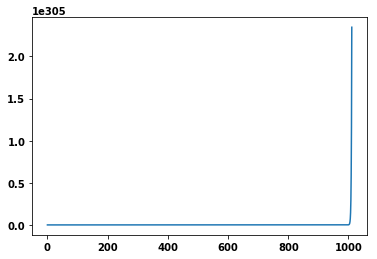

In [21]:
while loop_times > 0:
    k_delta = -1*learing_rate*derivate_k(price,func(room_num, k_hat, b_hat), room_num)
    b_delta = -1 * learing_rate * derivate_b(price, func(room_num, k_hat, b_hat))
    # k_delta_direction, b_delta_direction = direction
    #
    # k_delta = k_delta_direction * step()
    # b_delta = b_delta_direction * step()
    #
    # new_k = best_k + k_delta
    # new_b = best_b + b_delta
    k_hat +=k_delta
    b_hat +=b_hat
    estimated_price = func(room_num, k_hat, b_hat)
    error_rate = loss(y=price, yhat=estimated_price)
    print('loop == {}'.format(loop_times))
    print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, error_rate))
    losses .append(error_rate)
    loop_times -= 1
plt.plot(range(len(losses)), losses)
plt.show()

# QA  
1. Why do we need machine learning methods instead of creating a complicated formula?  
Ans: Because machine learning can be adjuested by the different data. However different data need different formula that is more complicated than the maching learning.   
2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?  
Ans: Maching choose direction random in this process that could waste many computer power.  
3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directinmethod?
Ans:Yes that is better than 1st one. The direction only changed in some certain range.  
4. Why do we use Derivative / Gredient to fit a target function?  
Ans:Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).  
5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?  
Ans:Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point. If, instead, one takes steps proportional to the positive of the gradient, one approaches a local maximum of that function; the procedure is then known as gradient ascent.  
6. What's the advantages of the 3rd gradient descent method compared to the previous methods?  
Ans:The 3rd gradient descent method can change direction through every step.  
7. Using the simple words to describe: What's the machine leanring.  
Ans:Use machine instead of people's work.  